## Setup Inicial

In [25]:
import cv2 as cv
import matplotlib.pyplot as plt
from os import listdir, remove, path, rename
from imghdr import what
from sklearn.model_selection import train_test_split
from tensorflow import __version__, keras
from keras.models import Sequential
from keras.layers import Dense

In [24]:
__version__

'2.11.0'

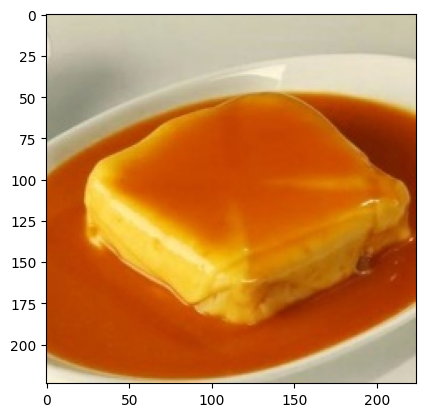

In [8]:
img = cv.imread('assets/francesinha/4.jpg')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

## Tratamento dos Dados

#### Remover possíveis imagens irreconhecíveis pelo Python

In [9]:
extensoes = ['jpeg', 'png', 'jpg', 'JPG', 'JPEG', 'PNG']

In [10]:
listdir('assets')

['aletria',
 'arroz_cabidela',
 'arroz_doce',
 'baba_camelo',
 'bacalhau_bras',
 'bacalhau_natas',
 'bola_berlim',
 'bolinhos_bacalhau',
 'bolo_bolacha',
 'cabrito',
 'caldo_verde',
 'canja',
 'carne_porco_alentejana',
 'cozido_portuguesa',
 'esparguete_bolonhesa',
 'feijoada',
 'francesinha',
 'jardineira',
 'leite_creme',
 'pao_de_lo',
 'pastel_nata',
 'rabanada',
 'rojoes',
 'tarte_maca',
 'tripas_moda_porto']

In [11]:
for class_imagem in listdir('assets'): 
    for imagem in listdir(path.join('assets', class_imagem)): # Para todas as pastas de imagens
        path_imagem = path.join('assets', class_imagem, imagem) # Cada imagem em cada pasta
        try:
            img = cv.imread(path_imagem) # Abrir a imagem
            tip = what(path_imagem)
            if tip not in extensoes:
                print('Imagem não compatível com a leitura Python, a remover a imagem {}'.format(path_imagem))
                remove(path_imagem)
        except Exception as e:
            print('Erro com a imagem {}'.format(path_imagem))

Imagem não compatível com a leitura Python, a remover a imagem assets\baba_camelo\kiGH9ukZK6Q4hvtDtwwVc1yvueg.svg
Imagem não compatível com a leitura Python, a remover a imagem assets\baba_camelo\p24-baba-de-camelo-2-1024x678-2-750x497.jpg


#### Transformar todas as imagens para terem o mesmo tamanho

In [13]:
for pasta in listdir('assets'): 
    subpasta = path.join('assets', pasta)
    
    for imagem in listdir(subpasta):
        if imagem.endswith('.jpeg') or imagem.endswith('.png') or imagem.endswith('.jpg') or imagem.endswith('.JPG') or imagem.endswith('.JPEG') or imagem.endswith('.PNG'):
            # Ler a imagem
            img = cv.imread(path.join(subpasta, imagem))

            # Colocar imagens todas no mesmo tamanho
            img = cv.resize(img, (224,224))

            # Colocar as imagens no formato RGB
            img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

            # Gravar a nova imagem
            cv.imwrite(path.join(subpasta, imagem), img)

#### Renomear as imagens em numeros

In [20]:
assets = 'assets'

# Entrar em todas as subpastas dos assets
for sub in listdir(assets):
    subpasta = path.join(assets, sub)
    
    # Se for uma pasta, continua
    if path.isdir(subpasta):
        # Contador para renomear as imagens a começar a 1
        i = 1
        
        # Fazer um loop para todas as imagens
        for nome_imagem in listdir(subpasta):
            caminho = path.join(subpasta, nome_imagem)

            # Verificar se o ficheiro não é uma pasta e tem uma extensão de uma imagem
            if path.isfile(caminho) and nome_imagem.endswith(('.jpg', '.jpeg', '.png', '.JPG', '.JPEG', 'PNG')):
            
                # Gerar novo nome para imagem
                novo_nome = str(i) + ".jpg"   # Mudar a extensão das imagens para jpg, caso nao esteja
                
                # Verificar se o novo nome já existe em alguma das imagens
                while path.exists(path.join(subpasta, novo_nome)):
                    i += 1
                    novo_nome = str(i) + ".jpg"   # Mudar a extensão das imagens para jpg, caso nao esteja
                
                # Renomear as imagens
                rename(caminho, path.join(subpasta, novo_nome))

            # Incrementar o contador para a próxima imagem
            i += 1

#### Divisão dos Dados

In [21]:
# Listas vazias para guardar os paths das imagens e as suas labels
path_imagens = []
labels = []

In [22]:
# Obter os paths e as labels das imagens
for label in listdir('assets'):
    pasta_label = path.join('assets', label)
    if path.isdir(pasta_label): # isdir vai procurar por pastas para retirar os paths das imagens dentro dessa pasta
        for imagem in listdir(pasta_label):
            caminho_imagem = path.join(pasta_label, imagem)
            path_imagens.append(caminho_imagem)
            labels.append(label)

# Dividir os dados em dados de treino e dados de validação
img_treino, img_validacao, labels_treino, labels_validacao = train_test_split(path_imagens, labels, test_size=0.25, random_state=2023)

# Print do numero de amostras nos daods de treino e validação
print('Amostras de treino:',len(img_treino))
print('Amostras de validação:',len(img_validacao))

Amostras de treino: 4134
Amostras de validação: 1379


#### Data Augmentation

In [ ]:
# Code

## Rede Neuronal

In [26]:
def neural_network (prev_Training, class_Training):
    #Creating Neural network
    classifier = Sequential()

    #Adding Layers
    classifier.add(Dense(units = 12, activation = 'relu', kernel_initializer = 'random_uniform', input_dim = 24))
    #hidden Layer
    classifier.add(Dense(units = 12, activation = 'relu', kernel_initializer = 'random_uniform'))
    #Camada Saida
    classifier.add(Dense(units=1, activation = 'relu'))

    #Otimizer
    otimizer = keras.optimizers.Adam(learning_rate=0.01, weight_decay=0.0001,clipvalue=0.5)
    classifier.compile(optimizer=otimizer, loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

    #Treino
    classifier.fit(prev_Training,class_Training, batch_size = 10, epochs = 100)

    #obter peso
    weight0 = classifier.layers[0].get_weights()

    return classifier